# 02 Exploratory Data Analysis

In [2]:
import os

os.chdir("..")
print("Current working dir:", os.getcwd())
#print("Files in raw folder:", os.listdir("data/raw"))

Current working dir: C:\Users\Window\Desktop\Everything_Data_Mentorship\mentorship_ds_project


In [3]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

## a. Import Data

In [4]:
cleaned_df = pd.read_csv("data/interim/cleaned_df.csv")

In [5]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                115 non-null    object 
 1   age_range                115 non-null    object 
 2   gender                   115 non-null    object 
 3   country                  115 non-null    object 
 4   referral_source          115 non-null    object 
 5   years_experience         115 non-null    object 
 6   track_applied            115 non-null    object 
 7   weekly_commitment_hours  115 non-null    object 
 8   main_aim                 115 non-null    object 
 9   motivation               115 non-null    object 
 10  skill_level              114 non-null    object 
 11  aptitude_test_completed  115 non-null    object 
 12  total_score              115 non-null    float64
 13  graduated                115 non-null    object 
dtypes: float64(1), object(13)


### Convert  age_range, years_experience, weekly_commitment_hours, and skill_level to categorical data

In [6]:
#Keeep the years_experience ordered and categorical for visualization

experience_categories = [
    "Less than six months",
    "6 months - 1 year",
    "1-3 years",
    "4-6 years"
]

cleaned_df["years_experience"] = pd.Categorical(
    cleaned_df["years_experience"], 
    categories=experience_categories, 
    ordered=True
)

In [7]:
#ordered categories for weekly_commitment_hours column

commitment_categories = ["less than 6 hours", "7-14 hours", "more than 14 hours"]

cleaned_df["weekly_commitment_hours"] = pd.Categorical(
    cleaned_df["weekly_commitment_hours"], 
    categories=commitment_categories, 
    ordered=True
)

In [8]:
#ordered categories for skill_level column

skill_level_categories = ["Beginner", "Elementary", "Intermediate"]

cleaned_df["skill_level"] = pd.Categorical(
    cleaned_df["skill_level"].replace({
        "Beginner - I have NO learning or work experience in data analysis/ data science": "Beginner",
        "Elementary - I have theoretical understanding of basic data analysis/ data science concepts": "Elementary",
        "Intermediate - I have theoretical knowledge and experience in data analysis/ data science": "Intermediate"
    }),
    categories=skill_level_categories,
    ordered=True
)

In [9]:
#ordered categories for age_range column

age_categories = ["18-24 years", "25-34 years", "35-44 years", "45-54 years"]

cleaned_df["age_range"] = pd.Categorical(cleaned_df["age_range"], categories=age_categories, ordered=True)

In [10]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   timestamp                115 non-null    object  
 1   age_range                115 non-null    category
 2   gender                   115 non-null    object  
 3   country                  115 non-null    object  
 4   referral_source          115 non-null    object  
 5   years_experience         115 non-null    category
 6   track_applied            115 non-null    object  
 7   weekly_commitment_hours  115 non-null    category
 8   main_aim                 115 non-null    object  
 9   motivation               115 non-null    object  
 10  skill_level              114 non-null    category
 11  aptitude_test_completed  115 non-null    object  
 12  total_score              115 non-null    float64 
 13  graduated                115 non-null    object  
dtypes: categor

In [16]:
cleaned_df["total_score"].min()

58.33

In [14]:
missing = cleaned_df[cleaned_df["skill_level"].isna()]
missing.head()

,timestamp,age_range,gender,country,referral_source,years_experience,track_applied,weekly_commitment_hours,main_aim,motivation,skill_level,aptitude_test_completed,total_score,graduated
87,2024-12-02 14:57:07,25-34 years,Male,Kenya,Friend,4-6 years,Data analysis,7-14 hours,Upskill,My motivation is to enhance my expertise in da...,NaN,Yes,72.0,No


### Using .describe() to find the summary statistics of the data

In [11]:
cleaned_df.describe(include="all")

,timestamp,age_range,gender,country,referral_source,years_experience,track_applied,weekly_commitment_hours,main_aim,motivation,skill_level,aptitude_test_completed,total_score,graduated
count,115,115,115,115,115,115,115,115,115,115,114,115,115.000000,115
unique,112,4,2,2,7,4,2,3,5,112,3,2,NaN,2
top,2024-12-02 23:41:04,18-24 years,Male,Kenya,WhatsApp,Less than six months,Data science,7-14 hours,Upskill,To learn a new skill so as to supplement my en...,Elementary,Yes,NaN,No
freq,2,62,70,114,53,72,62,64,74,2,56,112,NaN,84
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.014435,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.808071,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.330000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.670000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.330000,NaN


#### Key points 

1. We have 115 unique entries.
2. We have 4 diffrent age_ranges with 18-24 being the most common group - 62.
3. Most of the participants were Male - 70.
5. The most common referral_source was WhatsApp - 53.
6. Many students had less than 6 months of experience - 72.
7. Majority of the students enrolled for the Data Science track - 62.
8. Majority of the students agreed to a weekly commitment of 7-14hrs - 64.
9. The main aim of many students was to upskill - 74.
10. Almost half of the students skill level was Elementary - 56.
11. Many students undertook the amptitude test - 112.
12. The average score of the students was 69.01.
13. Majority of the students many did not graduate - 84.

## b. Univariate Analysis

### i. Categorical columns

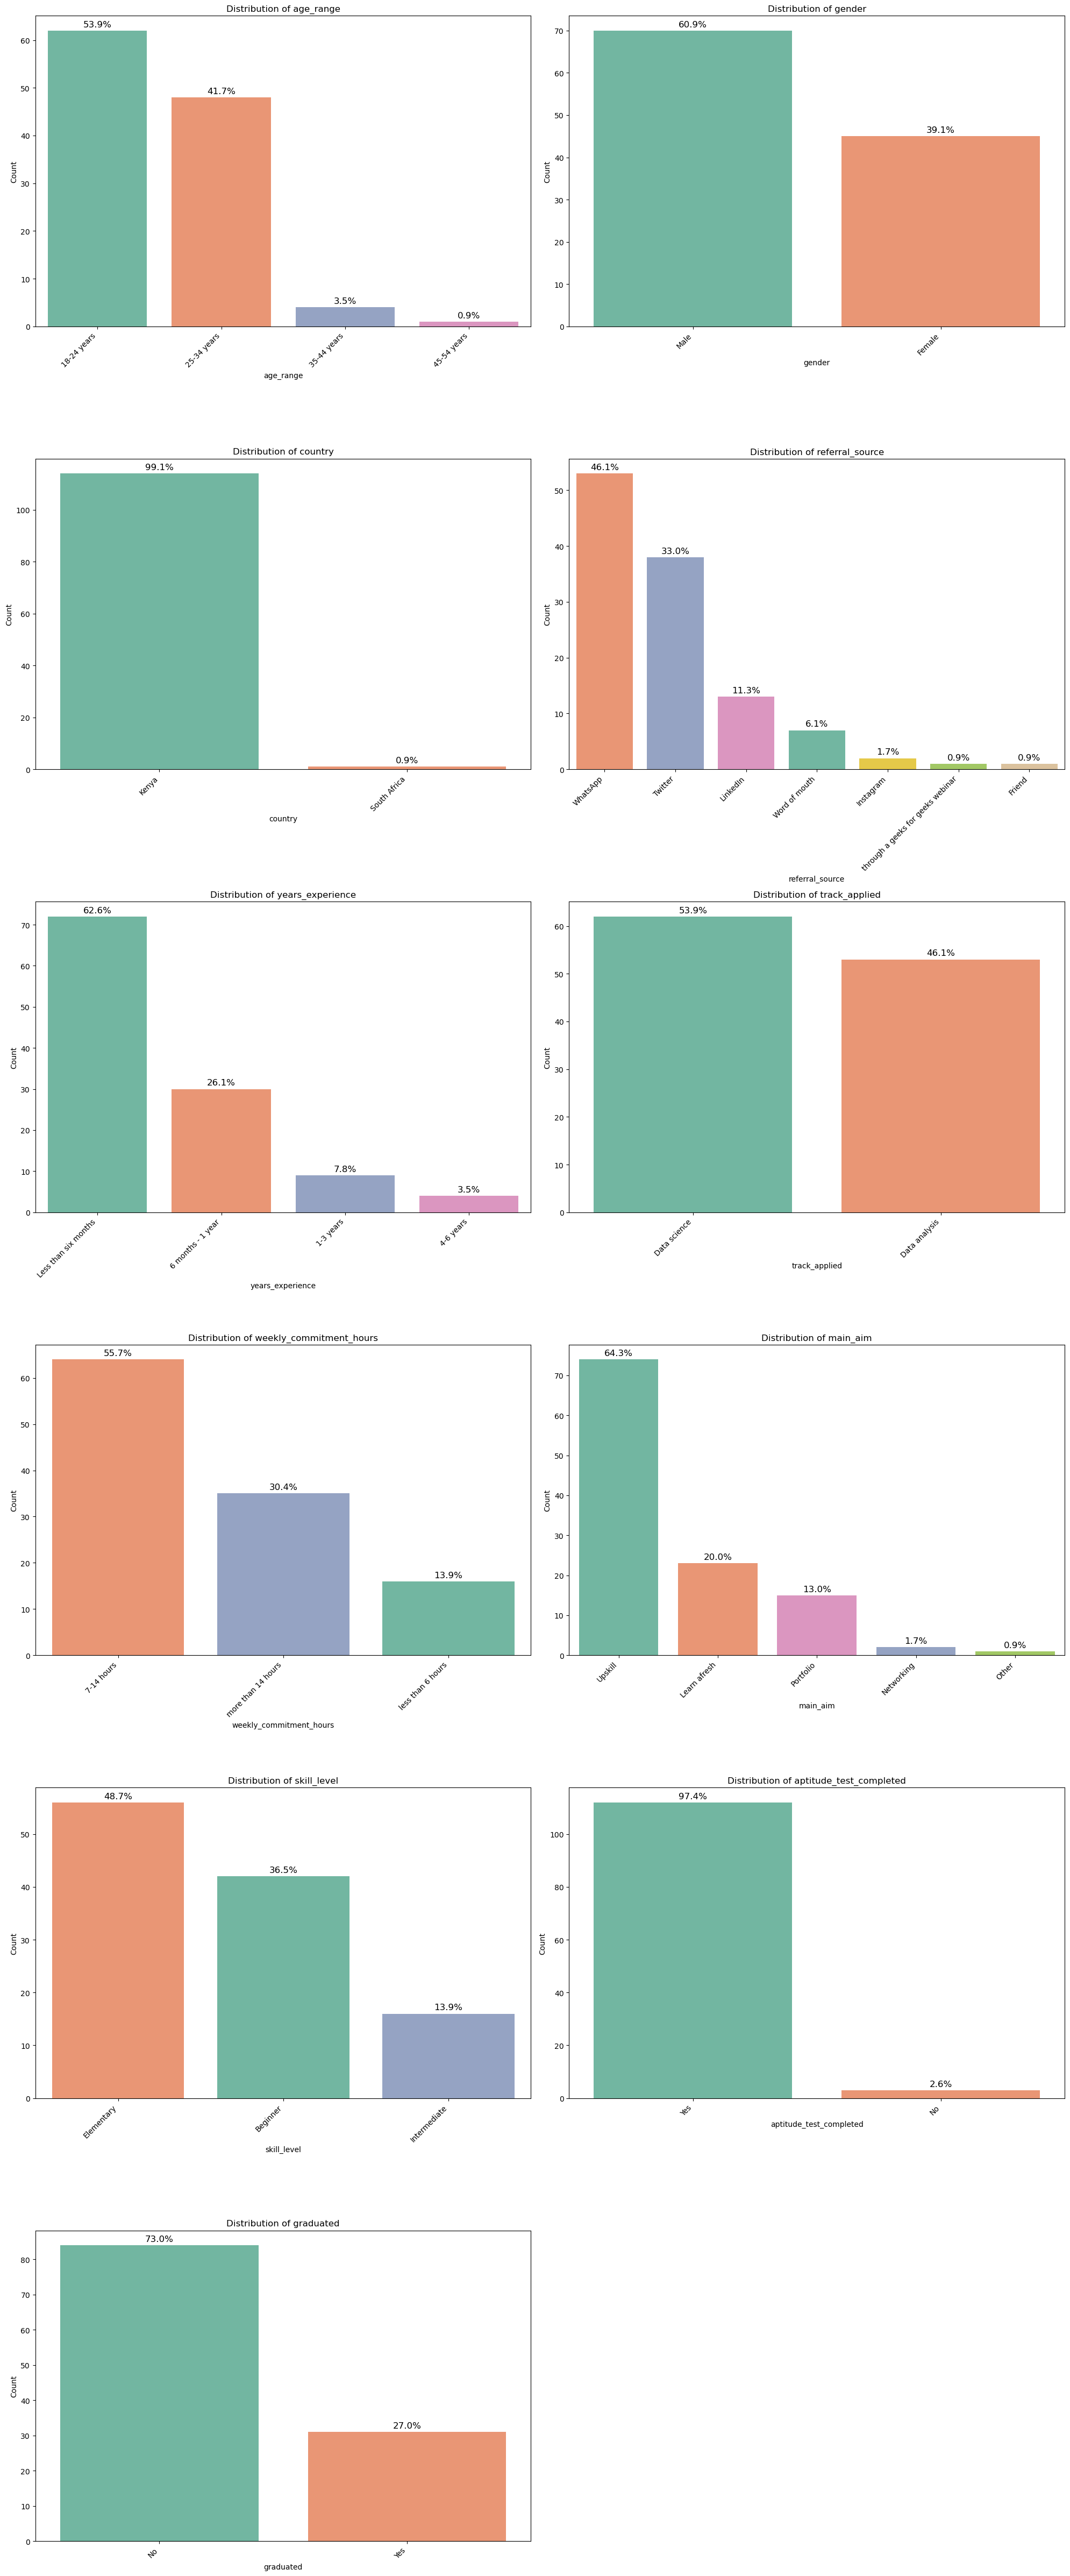

In [13]:
# Categorical columns
columns = cleaned_df.select_dtypes(include=['object', 'category']).columns.tolist()
columns_to_remove = ['timestamp','motivation']

cat_cols = [col for col in columns if col not in columns_to_remove]

# Adjust grid size here 
n_cols = 2
n_rows = (len(cat_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8*n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i] #get subplot axis to plot on
    total = len(cleaned_df[col])  # total number of rows in col
    
    # Plot counts
    sns.countplot(
        data=cleaned_df, 
        x=col, 
        order=cleaned_df[col].value_counts().index, #order by frequency
        palette="Set2", 
        hue=col, 
        legend=False, 
        ax=ax
    )
    
    # Annotation and styling
    for p in ax.patches: #loop over list of the bar rectangles
        height = p.get_height() #since each bar height corresponds to its count
        percentage = f'{100 * height/total:.1f}%'
        ax.annotate(percentage, 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 3),
                    textcoords='offset points')
    
    ax.set_title(f"Distribution of {col}")
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=45)
    
    #Set xticks alignment; right
    for tick in ax.get_xticklabels():
        tick.set_ha('right')

# Remove extra subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### ii. Numerical columns

In [15]:
#Summary stats for total_score column
cleaned_df["total_score"].describe()

count    115.000000
mean      69.014435
std        6.808071
min       58.330000
25%       64.000000
50%       68.670000
75%       73.330000
max       86.000000
Name: total_score, dtype: float64

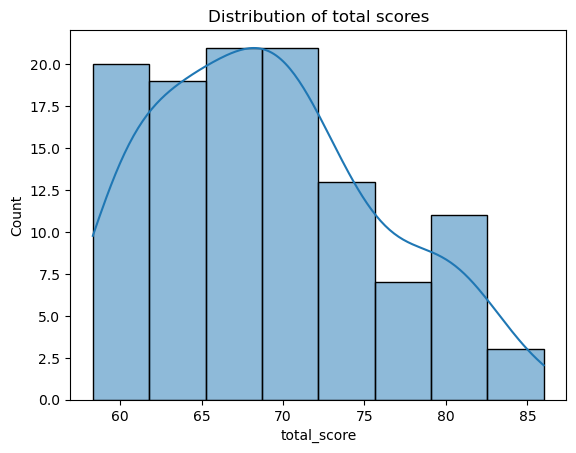

In [16]:
#Plot to check for distribution of the scores 
sns.histplot(data=cleaned_df, x="total_score", kde=True)
plt.title("Distribution of total scores")
plt.show()

#### Observations

1. Scores span from about 58 to 86.
2. The distribution looks slightly left-skewed (longer tail toward higher scores).
3. The peak (mode) is around 66-70, meaning most applicants scored in that range.
4. There’s noticeable variation; scores are spread across ~28 points.
5. No extreme outliers visible — the data looks fairly continuous.
6. Density curve (blue line) shows the probability density, it confirms that the bulk of scores cluster between 60 and 70, with fewer higher scorers above 75.

Most participants performed average to moderately well, with fewer achieving very high scores.

Since the scores cluster around the high-60s, this could be the benchmark / central tendency for the cohort.

## c. Bivariate Analysis

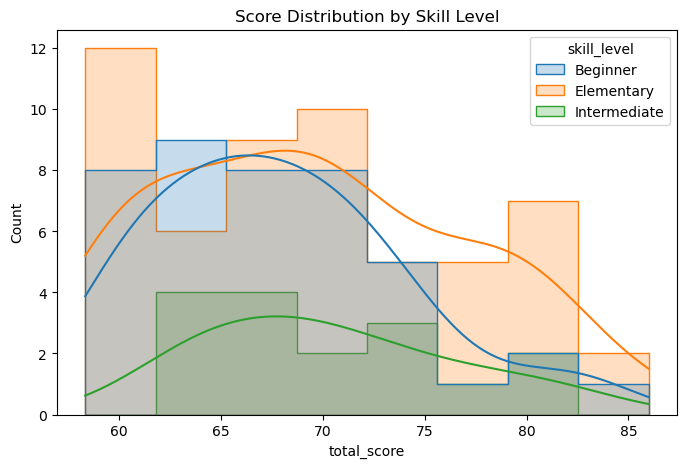

In [17]:
#Histogram / KDE split by Group
plt.figure(figsize=(8,5))
sns.histplot(data=cleaned_df, x="total_score", hue="skill_level", kde=True, element="step")
plt.title("Score Distribution by Skill Level")
plt.show()

#### Key Observations
Beginner Skill Level: The scores for this group are concentrated in the lower range, peaking around 65-70. The distribution appears to be skewed toward the higher end of the range.

Elementary Skill Level: This group has a wider range of scores, with the distribution centered around a higher score, roughly 68. This is the largest group, with scores reaching as high as the mid-80s.

Intermediate Skill Level: The scores for this group are concentrated in the middle of the range, peaking around high 60s. The distribution is less pronounced than the other two groups, suggesting more variability in performance.

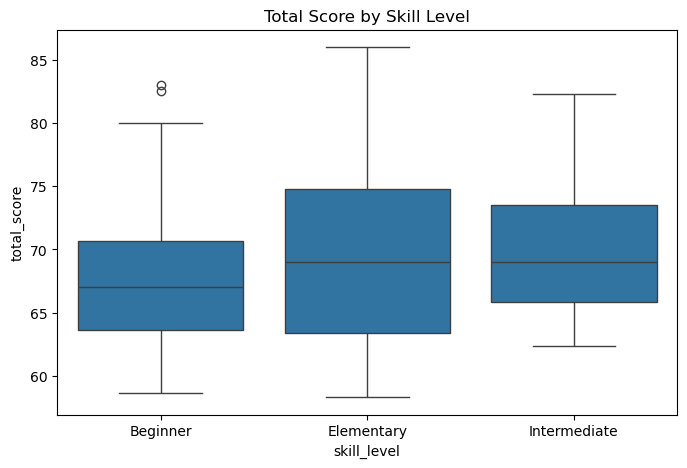

In [18]:
#Boxplot: Scores vs Skill Level
plt.figure(figsize=(8,5))
sns.boxplot(x="skill_level", y="total_score", data=cleaned_df)
plt.title("Total Score by Skill Level")
plt.show()

#### Key Observations
Beginner: The scores for this group are the lowest overall. The median score is around 67. The box itself covers the interquartile range (IQR), from approximately 63 to 71. There's also an outlier, suggesting that some student scored significantly higher than their peers.

Elementary: The box is wider than the other two, indicating a greater spread of scores. The range of scores is also wider, from the low 60s to the high 80s.

Intermediate: The median score is approximately similar tovthat of elementary , and the interquartile range (IQR) is roughly from 66 to 74. The spread of scores is similar to the Beginner group, but the overall scores are slightly higher.

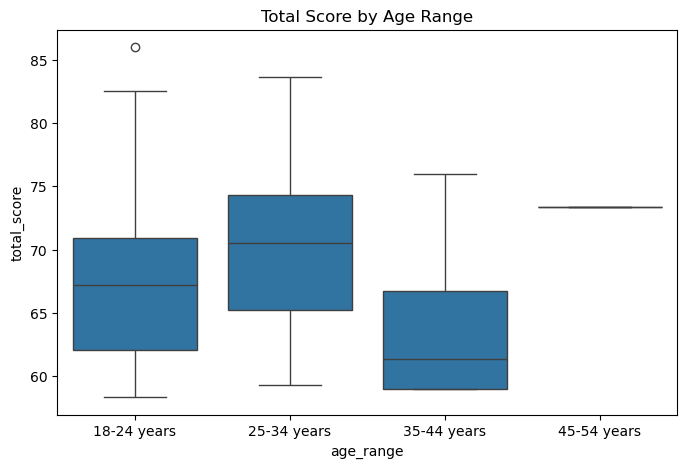

In [19]:
#Boxplot: Scores vs Age Range
plt.figure(figsize=(8,5))
sns.boxplot(x="age_range", y="total_score", data=cleaned_df)
plt.title("Total Score by Age Range")
plt.show()

#### Key Observations
18-24 years: This group has a wide range of scores. The median score is around 67. A few outiers above 85. This suggests that younger participants are more varied in performance — some do very well, others much lower.

25-34 years: Overall, this group shows relatively stronger performance than 18–24. The median score is high, at approximately 71. The spread is also broad, from around 59 to 84.

35-44 years: Median is much lower, around 61. Distribution is narrower, 59 - 76. Indicates this group tends to score consistently lower, with fewer high performers compared to the younger groups.

45-54 years: Only one or very few data points. But the score is relatively high.

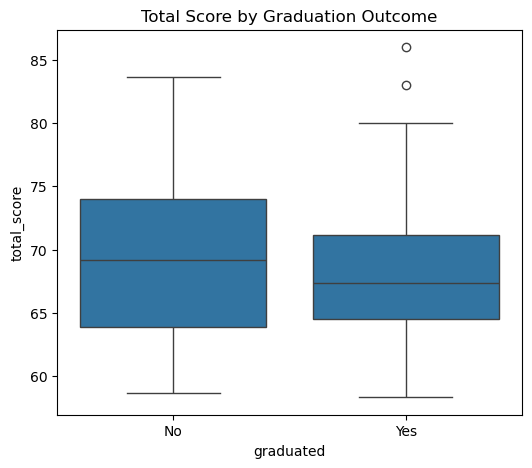

In [20]:
#Boxplot: Scores vs Graduation
plt.figure(figsize=(6,5))
sns.boxplot(x="graduated", y="total_score", data=cleaned_df)
plt.title("Total Score by Graduation Outcome")
plt.show()

#### Key Observations
Graduated - Yes: This group has a slightly wider range of scores, but the median score is slightly lower than the non-graduated group, at around 68. The IQR for this group is also broad, from roughly 65 to 73. There are a few outliers too.

Graduated - No: This group has a higher median score, at around 69. The scores are more tightly clustered than the graduated group, with the IQR spanning from about 64 to 74.

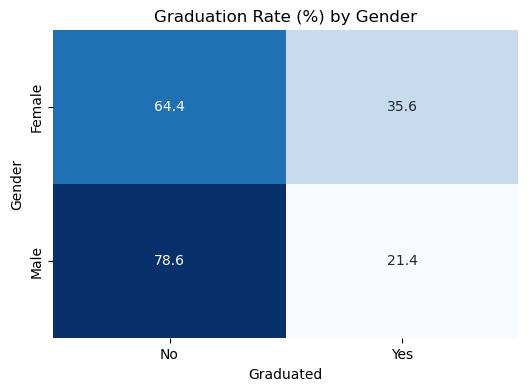

In [21]:
#Gender vs Graduated
ct_gender_grad = pd.crosstab(cleaned_df["gender"], cleaned_df["graduated"], normalize="index") * 100
plt.figure(figsize=(6,4))
sns.heatmap(ct_gender_grad, annot=True, fmt=".1f", cmap="Blues", cbar=False)
plt.title("Graduation Rate (%) by Gender")
plt.ylabel("Gender")
plt.xlabel("Graduated")
plt.show()

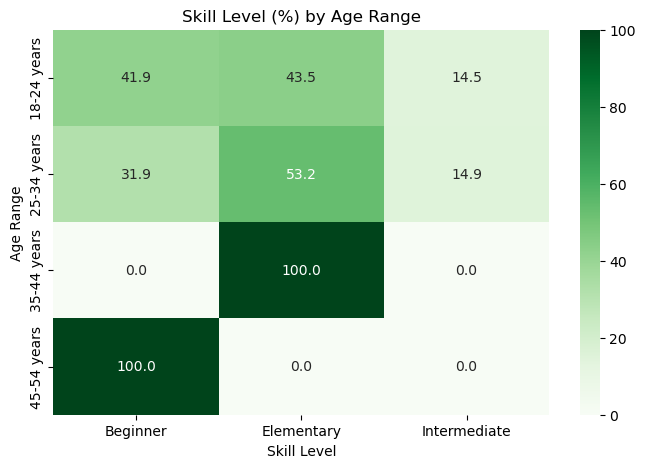

In [22]:
# Age range vs Skill level
ct_age_skill = pd.crosstab(cleaned_df["age_range"], cleaned_df["skill_level"], normalize="index") * 100
plt.figure(figsize=(8,5))
sns.heatmap(ct_age_skill, annot=True, fmt=".1f", cmap="Greens", cbar=True)
plt.title("Skill Level (%) by Age Range")
plt.ylabel("Age Range")
plt.xlabel("Skill Level")
plt.show()

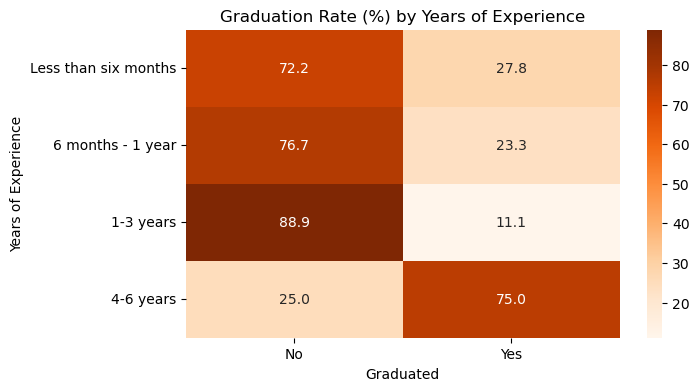

In [23]:
#Years of experience vs Graduated
ct_exp_grad = pd.crosstab(cleaned_df["years_experience"], cleaned_df["graduated"], normalize="index") * 100
plt.figure(figsize=(7,4))
sns.heatmap(ct_exp_grad, annot=True, fmt=".1f", cmap="Oranges", cbar=True)
plt.title("Graduation Rate (%) by Years of Experience")
plt.ylabel("Years of Experience")
plt.xlabel("Graduated")
plt.show()

## d. Multivariate Analysis

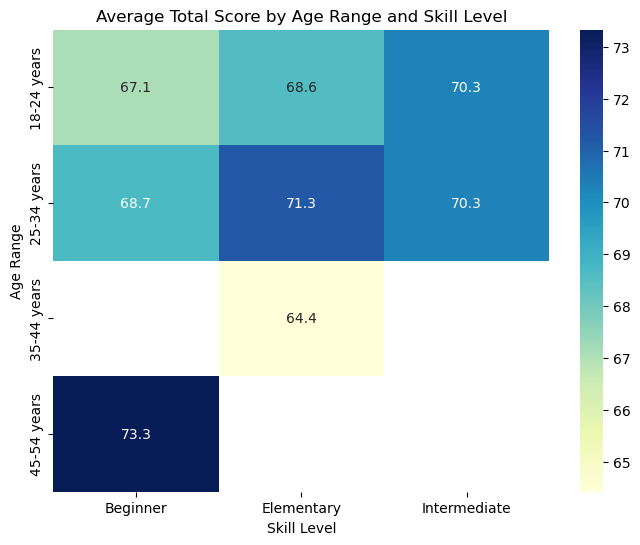

In [24]:
# Grouping and aggregating
grouped_scores = cleaned_df.groupby(["age_range", "skill_level"], observed=False)["total_score"].mean().unstack()

# Heatmap of average total_score
plt.figure(figsize=(8,6))
sns.heatmap(grouped_scores, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Average Total Score by Age Range and Skill Level")
plt.ylabel("Age Range")
plt.xlabel("Skill Level")
plt.show()

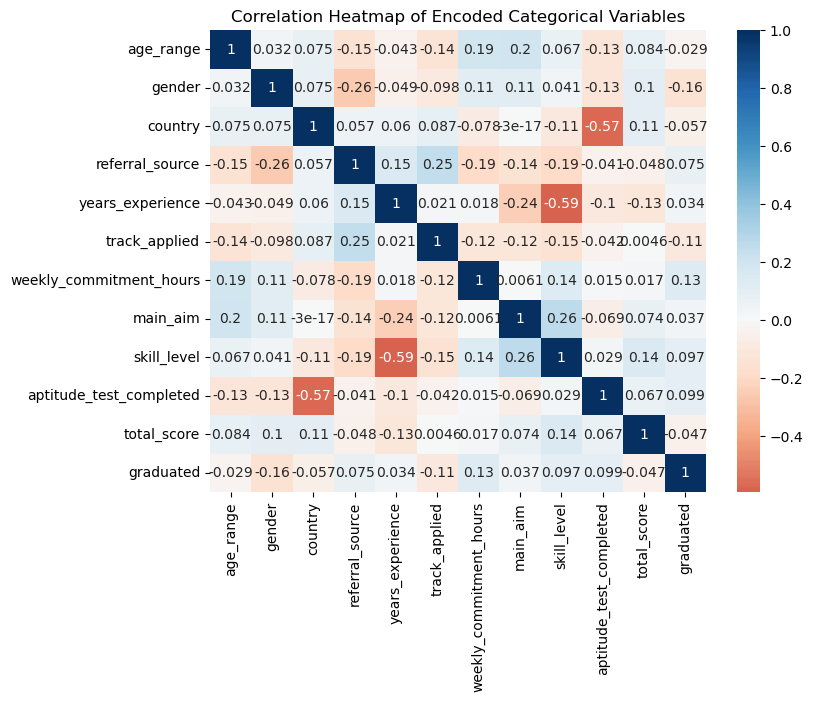

In [28]:
#Import LableEncoder to encode categorical data
from sklearn.preprocessing import LabelEncoder

# Categorical columns
columns = cleaned_df.select_dtypes(include=['object', 'category']).columns.tolist()
columns_to_remove = ['timestamp', 'motivation']

#List of columns
cat_cols = [col for col in columns if col not in columns_to_remove]

# Encode categorical variables
encoded_df = cleaned_df.drop(columns=columns_to_remove)
for col in cat_cols:
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col].astype(str))

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(encoded_df.corr(), annot=True, cmap="RdBu", center=0)
plt.title("Correlation Heatmap of Encoded Categorical Variables")
plt.show()

#### Key Observations

1. Strong negative correlations

    country vs. referral_source (-0.57) - Certain referral sources are strongly linked with specific countries (one dominates when the other is
    absent).
    
    skill_level vs. years_experience (-0.59) → Higher years of experience are inversely coded with skill level in your encoding. This suggests the way
    skill levels were assigned doesn’t align directly with years of experience.
    
2. Moderate positive correlations
    
    referral_source vs. track_applied (0.25)  - Referral source seems to influence the track applicants chose.
    
    main_aim vs. skill_level (0.26) → Learners’ stated aim is somewhat related to their skill level (certain aims are more common among more advanced      learners).
    
    graduated vs. weekly_commitment_hours (0.13) → A weak positive correlation, suggesting slightly higher weekly commitment may be linked to higher       graduation chances.
    
3. Weak correlations with target variables
    
    graduated has no strong single predictor here (all values < 0.2). It means graduation depends on multiple factors, not one categorical feature         alone.
    
    total_score is weakly correlated with most features. This indicates test performance is fairly independent of demographic/categorical encodings.
    
4. Gender and outcomes
    
    gender vs. graduated (-0.16) - Slight negative correlation. Depending on encoding, this could suggest one gender has a lower graduation rate, but      effect size is small.

#### A better test for indepence in categorical varibles is the Chi-square test

Null Hypothesis: Categorical columns are independent.
Alternative Hypothesis: Categorical columns are not independent.

I chose an alpha of 0.05

In [29]:
#Import chi2_contingency to test for independence
from scipy.stats import chi2_contingency

# Categorical columns
columns = cleaned_df.select_dtypes(include=['object', 'category']).columns.tolist()
columns_to_remove = ['timestamp', 'id_number',  'motivation']

#List of columns
cat_cols = [col for col in columns if col not in columns_to_remove]

#Loop through each of the categorical column
results = []
alpha = 0.05
for i in range(len(cat_cols)):
    
    for j in range(i+1, len(cat_cols)):
        
        table = pd.crosstab(cleaned_df[cat_cols[i]], cleaned_df[cat_cols[j]])
        chi2, p, dof, _ = chi2_contingency(table)
        
        # Keep only significant associations
        if p < alpha:
            results.append((cat_cols[i], cat_cols[j], chi2, p))
        
#Convert to dataFrame
chi_results = pd.DataFrame(results, columns=["Var1", "Var2", "Chi2", "p_value"])

# Sort by strongest significance
chi_results.sort_values("p_value", inplace=True)
chi_results.reset_index(drop=True, inplace=True)
chi_results

,Var1,Var2,Chi2,p_value
0,years_experience,skill_level,53.379067,9.841247e-10
1,country,aptitude_test_completed,8.917574,2.824395e-03
2,referral_source,years_experience,36.589168,5.925257e-03
3,gender,referral_source,16.862166,9.803378e-03
4,referral_source,track_applied,13.709629,3.305342e-02
5,weekly_commitment_hours,skill_level,9.780517,4.429168e-02


#### Key observations

Some of the categorical variables are dependent on one another as there’s a statistically significant association between them.

1. As expected, people with more years of experience tend to report higher skill levels.
2. Test completion rates differ significantly by country. This might reflect access to resources, awareness, or regional differences in participation.
3. The way people hear about the program/opportunity (referral source) is related to their experience level. For example, beginners may come from social media, while experienced candidates may come through professional networks.
4. Referral sources differ by gender. For instance, one gender may rely more on peer referrals, while another may use online ads or institutions.
5. How applicants heard about the program influences the track they choose to apply for. Perhaps social media attracts more interest in one track, while direct referrals lead to another.
6. Skill level is related to how many hours candidates can commit weekly. Likely, more skilled individuals are also more willing or able to dedicate more time.

## e. Graduation Insights

#### 1. Overall Graduation rate

Overall Graduation Rate:
graduated
No     73.043478
Yes    26.956522
Name: proportion, dtype: float64


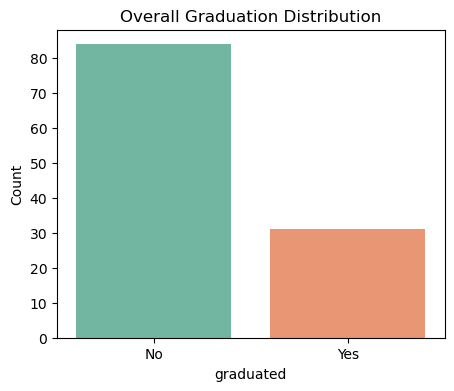

In [30]:
# Overall graduation rate
print("Overall Graduation Rate:")
print(cleaned_df["graduated"].value_counts(normalize=True) * 100)

# Plot overall graduation distribution
plt.figure(figsize=(5,4))
sns.countplot(data=cleaned_df, x="graduated", palette="Set2", hue=col, legend=False)
plt.title("Overall Graduation Distribution")
plt.ylabel("Count")
plt.show()

#### Key observations
Only about 1 in 4 participants successfully graduate.

What that suggests

High attrition: The majority of learners (73%) do not complete, which signals a challenge in sustaining engagement.

Barrier to completion: Something between enrollment and graduation filters out most participants.

Risks

If the goal is broad skill development, a 27% graduation rate may limit program impact.

It may also reflect entry requirements too low (many join, but aren’t ready), or support structures too weak (many drop off).

#### 2. Graduation rate by categories


Graduation rate by age_range:
graduated            No        Yes
age_range                         
18-24 years   72.580645  27.419355
25-34 years   72.916667  27.083333
35-44 years   75.000000  25.000000
45-54 years  100.000000   0.000000


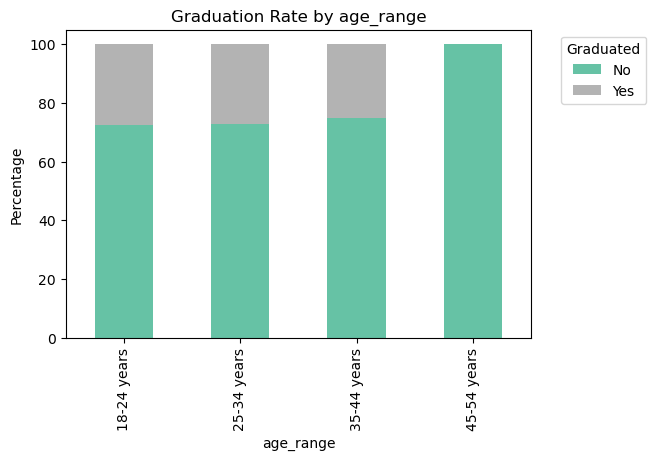


Graduation rate by gender:
graduated         No        Yes
gender                         
Female     64.444444  35.555556
Male       78.571429  21.428571


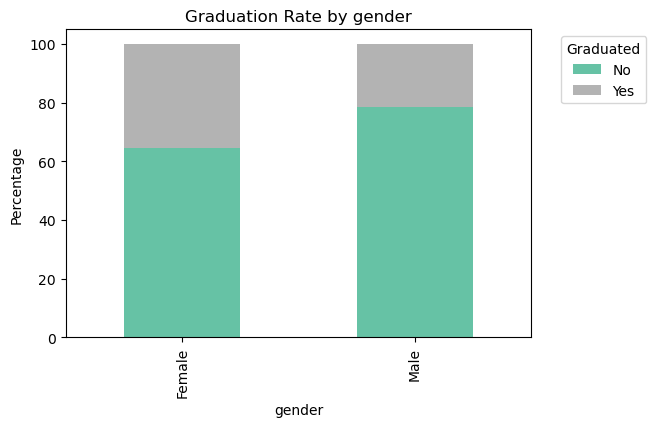


Graduation rate by country:
graduated             No        Yes
country                            
Kenya          72.807018  27.192982
South Africa  100.000000   0.000000


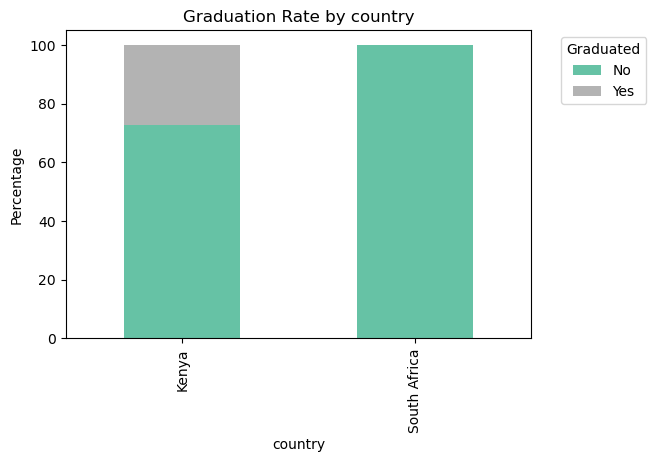


Graduation rate by referral_source:
graduated                                  No         Yes
referral_source                                          
Friend                             100.000000    0.000000
Instagram                          100.000000    0.000000
LinkedIn                            76.923077   23.076923
Twitter                             68.421053   31.578947
WhatsApp                            75.471698   24.528302
Word of mouth                       71.428571   28.571429
through a geeks for geeks webinar    0.000000  100.000000


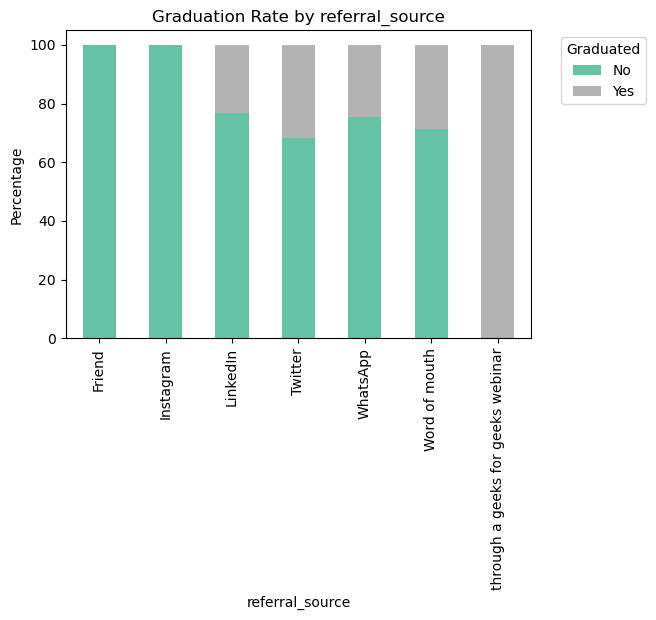


Graduation rate by years_experience:
graduated                    No        Yes
years_experience                          
Less than six months  72.222222  27.777778
6 months - 1 year     76.666667  23.333333
1-3 years             88.888889  11.111111
4-6 years             25.000000  75.000000


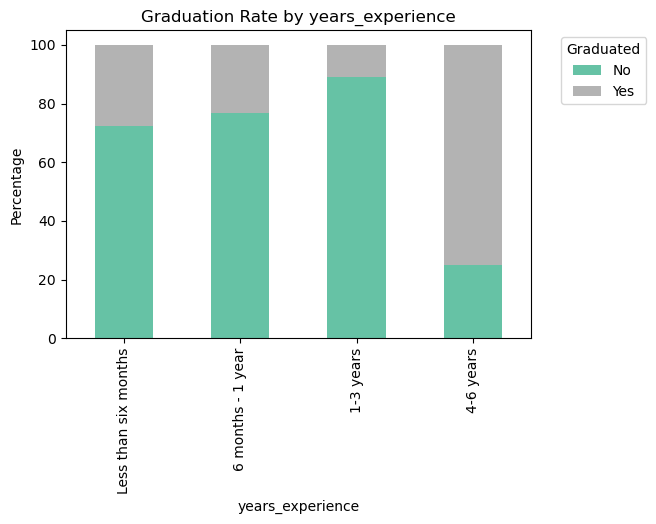


Graduation rate by track_applied:
graduated             No        Yes
track_applied                      
Data analysis  67.924528  32.075472
Data science   77.419355  22.580645


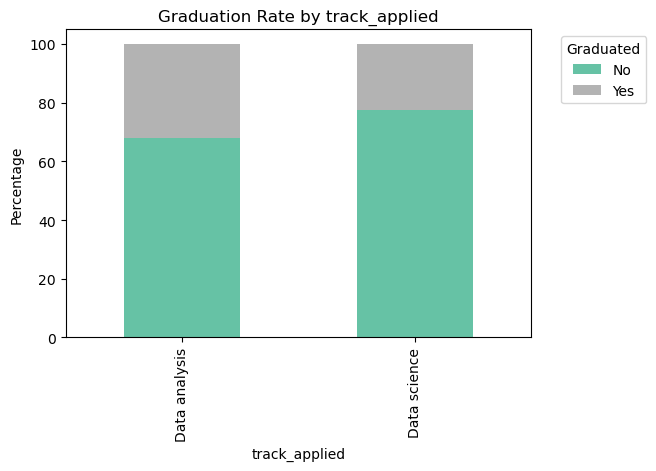


Graduation rate by weekly_commitment_hours:
graduated                       No        Yes
weekly_commitment_hours                      
less than 6 hours        68.750000  31.250000
7-14 hours               78.125000  21.875000
more than 14 hours       65.714286  34.285714


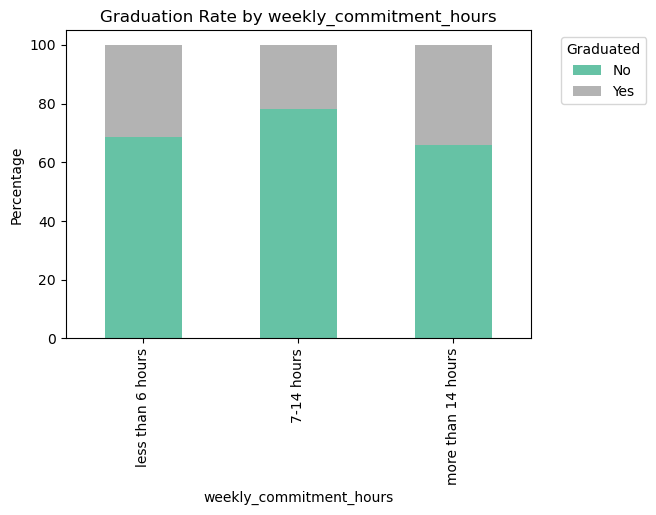


Graduation rate by main_aim:
graduated            No         Yes
main_aim                           
Learn afresh  78.260870   21.739130
Networking    50.000000   50.000000
Other          0.000000  100.000000
Portfolio     80.000000   20.000000
Upskill       71.621622   28.378378


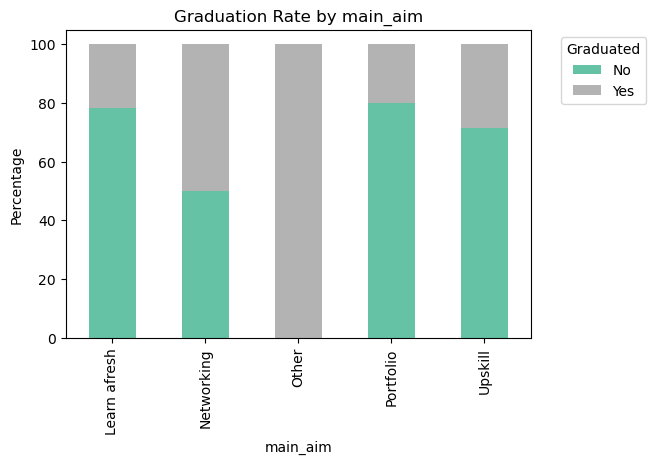


Graduation rate by skill_level:
graduated            No        Yes
skill_level                       
Beginner      78.571429  21.428571
Elementary    71.428571  28.571429
Intermediate  62.500000  37.500000


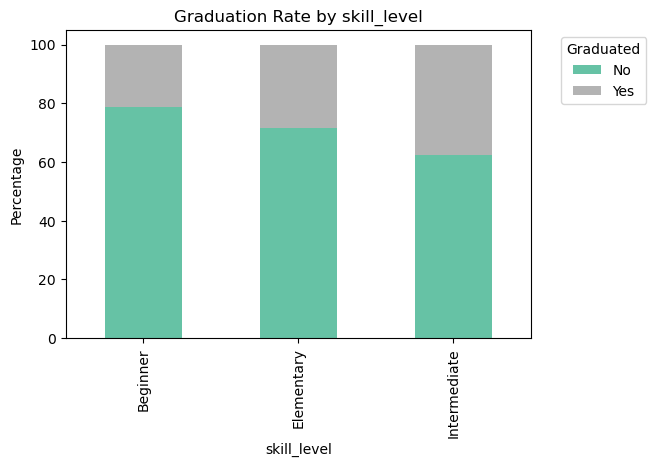


Graduation rate by aptitude_test_completed:
graduated                        No        Yes
aptitude_test_completed                       
No                       100.000000   0.000000
Yes                       72.321429  27.678571


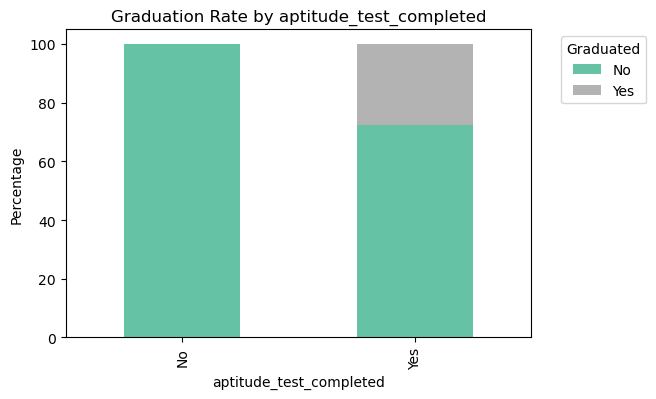

In [31]:
# Graduation rate by categories
# Categorical columns
columns = cleaned_df.select_dtypes(include=['object', 'category']).columns.tolist()
columns_to_remove = ['timestamp', 'id_number',  'motivation', 'graduated']

#List of columns
cat_cols = [col for col in columns if col not in columns_to_remove]

#Loop thorugh the columns
for col in cat_cols:
    print(f"\nGraduation rate by {col}:")
    grad_rate = pd.crosstab(cleaned_df[col], cleaned_df["graduated"], normalize="index") * 100
    print(grad_rate)
    
    # Plot stacked bar chart
    grad_rate.plot(kind="bar", stacked=True, figsize=(6,4), colormap="Set2")
    plt.title(f"Graduation Rate by {col}")
    plt.ylabel("Percentage")
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.legend(title="Graduated", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

#### Key Observations

1. Graduation rate by skill_level
    Beginners: only 15% graduated.
    Elementary: 25% graduated. 
    Intermediate: nearly 45% graduated.

2. Graduation rate by main_aim
    Networking seekers: 50% graduation rate - the highest. 
    Upskillers: about 28%.
    Learn afresh / Portfolio: both low ≈14%.

3. Graduation rate by weekly_commitment_hours
    <6 hrs: 25% graduated.
    7–14 hrs: ~22%.
    14 hrs: ~28%.

#### 3. Relationship between total_score and graduation

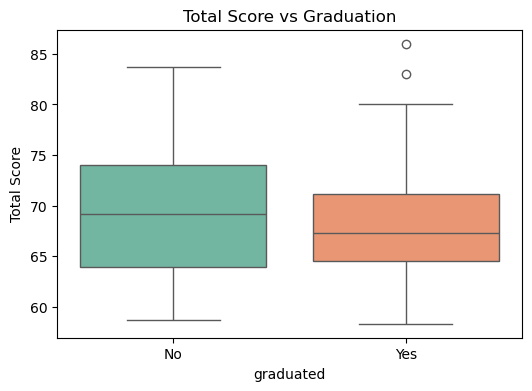

In [32]:
# Relationship between total_score and graduation
plt.figure(figsize=(6,4))
sns.boxplot(data=cleaned_df, x="graduated", y="total_score", palette="Set2", hue='graduated', legend=False)
plt.title("Total Score vs Graduation")
plt.ylabel("Total Score")
plt.show()

#### Key Observations
Graduated: Their scores cluster higher, with most between 68–75 and extending up to 85.

Not Graduated: More concentrated at the lower score range 58–68. 

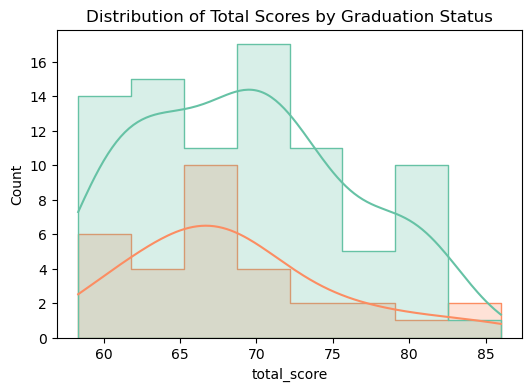

In [33]:
# Distribution of total score in relation to graduation status
plt.figure(figsize=(6,4))
sns.histplot(data=cleaned_df, x="total_score", hue="graduated", kde=True, palette="Set2", element="step", legend=False)
plt.title("Distribution of Total Scores by Graduation Status")
plt.show()

#### Key Observations
Graduates have a higher median (~70) compared to non-graduates (~67). Graduates’ scores are more compact, while non-graduates’ scores spread lower and overlap.

Overlap exists in mid-range scores ~65–70: Both groups appear in this zone, showing that score alone is not a perfect predictor

## f. Conclusion

1. Participant Demographics & Profiles

    Age distribution skewed toward younger participants, mainly 18–24 years.
    
    Experience levels varied, but most were beginners or elementary learners with limited prior exposure.
    
    Weekly commitment clustered in the 7–14 hour range.
    
    Gender balance and referral sources showed diversity but no strong dominance by a single category.

2. Categorical Distributions

    Clear patterns emerged when visualizing counts: most learners start from beginner/elementary levels, reflecting the program’s accessibility.
    
    Some referral sources (like friends or social media) were more common than others, shaping how learners discover the program.

3. Relationships Between Categories (Chi-square analysis)

    Significant associations were found between:
    
    Years of experience vs skill level (expected: more experience, higher skill).
    
    Years of experience vs graduation status (experience helped completion).
    
    Commitment hours vs skill level (greater commitment aligned with higher skill).
    
    Age range vs referral source (younger learners heard of the program differently).
    
    Main aim vs skill level (different motivations aligned with different competencies).
    
    These results indicate learning context, prior experience, and motivation interact strongly in shaping outcomes.

4. Numeric Patterns & Correlations

    Total score was positively associated with graduation. Higher-scoring participants had much greater odds of completing.
    
    Heatmaps showed that encoding categorical features into numeric form revealed clusters where skill level and experience aligned with higher mean scores.


5. Graduation Insights

    Overall graduation rate: relatively low, underscoring the challenge of program completion.
    
    Aptitude test: decisive factor. Skipping it = 0% graduation; attempting it raised success to ~25%.
    
    Skill level: Beginners (15%) and elementary (25%) graduated far less than intermediates (44%).
    
    Main aim: Networking was the strongest motivator (50% graduated), compared with learning afresh or portfolio building (~14%).
    
    Weekly commitment: Those spending more than 14 hours had the highest graduation (28%), showing time investment matters.

6. Key Takeaways

    Baseline readiness (experience + skill) and program engagement (aptitude test + time commitment) are the strongest drivers of graduation.
    
    Motivation type matters: those seeking community (networking) sustain effort better than those driven by individual goals.
    
    Risk groups: beginners, portfolio learners, and those with low commitment hours face the greatest risk of non-completion.